In [334]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Create dataset of colors (24 data points with each having 3 dimensions)
colors = np.array([[0,255,255], [205,92,92], [255,255,0], [0,0,205], [250,250,210], [0,100,0], [255,69,0], [255,20,147], [65,105,225], [46,139,87], [250,128,114], [178,34,34], [0,206,209], [50,205,50], [25,25,112], [255,0,255], [255,248,220], [0,0,128], [30,144,255], [139,0,0], [107,142,35], [70,130,180], [165,42,42], [95,158,160]])
# # print(len(colors))

names_of_colors = ['aqua', 'indian red', 'yellow', 'medium blue', 'light golden rod yellow', 'dark green', 'orange red', 'deep pink', 'royal blue', 'sea green', 'salmon', 'firebrick', 'dark turquoise', 'lime green', 'midnight blue', 'magenta', 'corn silk', 'navy', 'dodger blue', 'dark red', 'olive drab', 'steel blue', 'brown', 'cadet blue']
# # print(len(names_of_colors))

# Calibrate the color values to be between 0 & 1
colors = colors/255

# Create a 100x100 output grid with coordinates to every node
op_grid = np.array([(i, j) for i in range(100) for j in range(100)])

In [335]:
def change_learning_rate(lr, k, T):
    return lr * np.exp(-k/T) 
    
def change_sigma(sig, k, T):
    return sig * np.exp(-k/T)

In [336]:
def calc_distance(inp_x, old_weights):
    return np.array([np.linalg.norm(inp_x - w) for w in old_weights])

In [337]:
def get_winner_node(inp_x, old_weights):
    node = 0
    dist = calc_distance(inp_x, old_weights)
    node = np.argmin(dist)
    return node

In [338]:
# Update weights
def change_weights(lr, inp_x, old_weights,sig):
    new_weights = np.empty([100*100,3])
    winner_node = get_winner_node(inp_x, old_weights)
    winner_node_row = np.ceil(winner_node/100)
    winner_node_col = np.mod(winner_node, 100)
    
    # Calculate h(k) function between winning node and all other output nodes
    # Calculate distance between winning node and all nodes in the output grid (d_ij of h(k) function)
    d = calc_distance(np.array([winner_node_row, winner_node_col]), op_grid)
    
    for i in range(len(new_weights)):
        h = np.exp(-d[i]*d[i]/(2 * sig**2))
        new_weights[i] = old_weights[i] + (lr*h*(inp_x - old_weights[i]))
    return new_weights

(10000, 3)
[[0.99463373 0.021694   0.97630174]
 [0.99446644 0.0225444  0.97593689]
 [0.99427647 0.02356033 0.97541871]
 ...
 [0.23054661 0.53761063 0.17763645]
 [0.22472502 0.53725557 0.17721083]
 [0.21887492 0.53668463 0.17660251]]
[[0.97771936 0.97100574 0.22603116]
 [0.97600714 0.97076448 0.22676711]
 [0.97413058 0.97034354 0.22807097]
 ...
 [0.05714548 0.32321213 0.16856066]
 [0.05408575 0.32238847 0.1673279 ]
 [0.05119249 0.32163712 0.16610862]]
[[0.99968006 0.01112133 0.96225835]
 [0.99963367 0.0120846  0.96122   ]
 [0.99957676 0.01330122 0.95979917]
 ...
 [0.00630551 0.00761285 0.55889258]
 [0.00613783 0.00744465 0.56544064]
 [0.00599597 0.00731613 0.5722101 ]]
(10000, 3)
after:  (100, 100, 3)
(10000, 3)
after:  (100, 100, 3)
(10000, 3)
after:  (100, 100, 3)
(10000, 3)
after:  (100, 100, 3)
Plot for Sigma = 1


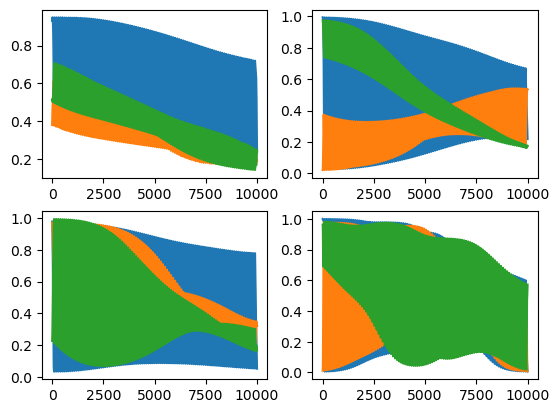

In [341]:
# Sigma = 1

# Initialize weights 
weights = np.empty([100*100,3])  # (10000 x 3) matrix 

for i in range(0, 100*100):
    weights[i][0] = random.randint(0,10)*0.01
    weights[i][1] = random.randint(0,10)*0.01
    weights[i][2] = random.randint(0,10)*0.01

    
T = 1000
lr = 0.8
sigma = 30
epoch_weights = [] # will store 4 values 

for epoch in range(0, T):
    ds = random.randint(0, 23) # select a random data point
    weights = change_weights(lr, colors[ds], weights, sigma)
    
    lr = change_learning_rate(0.8, epoch, T)
    sigma = change_sigma(30, epoch, T)
    
    if epoch == 19:
        epoch_weights.append(weights.copy())
        print(epoch_weights[0].shape)
    
    if epoch == 39:
        epoch_weights.append(weights.copy())
        print(epoch_weights[1])
        
    if epoch == 99:
        epoch_weights.append(weights.copy())
        print(epoch_weights[2])
    
    if epoch == 999:
        epoch_weights.append(weights.copy())
        print(epoch_weights[3])
    
# Plotting
for ew in epoch_weights:
    print(ew.shape)
    ew = ew.reshape(100,100,3)
    print("after: ", ew.shape)

print("Plot for Sigma = 1")
fig, axes = plt.subplots(2, 2)

# Plot data in each subplot
axes[0, 0].plot(epoch_weights[0])
axes[0, 1].plot(epoch_weights[1])
axes[1, 0].plot(epoch_weights[2])
axes[1, 1].plot(epoch_weights[3])
